In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('../outputs/data_ind/BTC-USD/BTC-USD_df_2y_1h.csv')
df = df.drop(columns=['candlestick_pattern', 'Volume'], axis=1)
df['Datetime'] = pd.to_datetime(df['Datetime'])
df_btc = df.iloc[:-1, :].copy()
df_btc = df_btc.dropna()

In [5]:
col_list = df.columns.to_list()

df_btc.dropna()

,Datetime,Open,High,Low,Close,sma_5,sma_10,sma_15,sma_20,sma_25,...,roc_20,roc_25,roc_30,roc_35,roc_40,roc_50,roc_99,candle_label,d_r,feature_label
0,2020-11-18 02:00:00+00:00,17702.574219,17706.990234,17653.152344,17653.736328,17657.043750,17623.830859,17406.200260,17219.553320,17108.314141,...,6.122745,5.635412,5.812906,8.155357,8.908108,10.781901,8.494524,-1.0,-0.002756,1.0
1,2020-11-18 03:00:00+00:00,17653.814453,17948.886719,17638.074219,17947.945312,17714.206250,17690.413672,17487.134245,17286.697266,17155.667734,...,8.087164,7.061754,7.037137,9.760221,10.786160,12.486557,10.111130,1.0,0.016666,1.0
2,2020-11-18 04:00:00+00:00,17947.955078,18393.949219,17947.955078,18325.052734,17866.716797,17763.168359,17578.132161,17371.495605,17221.127969,...,10.198797,9.806162,9.107389,11.720949,12.122560,14.824570,12.300606,1.0,0.021011,0.0
3,2020-11-18 05:00:00+00:00,18325.164062,18325.164062,17493.488281,17572.521484,17840.355469,17743.175000,17613.320312,17413.207910,17258.315703,...,4.984062,5.586150,5.303512,5.955540,7.953108,10.211416,8.046676,-1.0,-0.041066,1.0
4,2020-11-18 06:00:00+00:00,17572.599609,17819.820312,17559.623047,17744.451172,17848.741406,17753.533984,17665.439974,17465.679492,17304.649688,...,6.285896,6.983857,6.151789,6.441514,8.889370,11.347462,9.587773,1.0,0.009784,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16662,2022-10-23 10:00:00+00:00,19186.087891,19188.681641,19175.310547,19176.699219,19179.177734,19185.123242,19193.897526,19193.964453,19194.487969,...,-0.282067,0.116600,0.126054,0.018346,0.160823,1.002768,-0.296932,-1.0,-0.000455,0.0
16663,2022-10-23 11:00:00+00:00,19176.455078,19176.912109,19143.210938,19161.347656,19175.438672,19183.159375,19189.736068,19190.656055,19193.875078,...,-0.344132,-0.079901,0.040962,-0.063513,-0.215972,0.715611,-0.214409,-1.0,-0.000801,0.0
16664,2022-10-23 12:00:00+00:00,19161.333984,19164.806641,19124.197266,19154.394531,19172.954297,19178.076758,19185.659115,19188.563867,19192.718516,...,-0.217979,-0.150725,0.006659,-0.024446,-0.126911,0.776117,-0.593789,0.0,-0.000363,1.0
16665,2022-10-23 13:00:00+00:00,19154.681641,19175.173828,19153.154297,19174.783203,19170.531641,19175.393359,19183.869401,19188.401562,19192.020703,...,-0.016926,-0.090898,-0.014757,0.165448,0.069200,1.100340,-0.219725,1.0,0.001064,1.0


In [6]:
result_test = df.iloc[-1,:].copy()
#result_test = convert_matrix(result_test, col_list[1:])
#result_test = result_test.drop(columns=['d_r'], axis=1)
result_test

Datetime         2022-10-23 15:00:00+00:00
Open                          19191.744141
High                          19206.572266
Low                           19186.902344
Close                         19197.810547
                           ...            
roc_50                            0.777076
roc_99                            0.109517
candle_label                          -1.0
d_r                               0.000194
feature_label                          1.0
Name: 16667, Length: 233, dtype: object

In [7]:
df_btc = df_btc.reset_index()
df_btc['feature_label'].value_counts()

1.0    8419
0.0    8248
Name: feature_label, dtype: int64

In [8]:
df_btc = df_btc.drop(columns=['index'], axis=1)
df_btc.dropna()
col_list = df_btc.columns.to_list()
y_col = col_list.pop(-1)

In [9]:
#col_list = ['wllr_20', 'macdsignal', 'dmi_down_30', 'atr_15', 'cci_10', 'atr_40', 't3_5','t3_50']

In [10]:
X = df_btc[col_list[1:]]
y = df_btc[y_col]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [12]:
import lightgbm as lgb
clf = lgb.LGBMClassifier(objective="binary",
        metric="l2",
        boosting_type="gbdt",
        n_estimators=10000,
        num_leaves=50,
        max_depth=-1,
        learning_rate=0.0001,
        subsample=0.8)
clf.fit(X_train, y_train)

LGBMClassifier(learning_rate=0.0001, metric='l2', n_estimators=10000,
               num_leaves=50, objective='binary', subsample=0.8)

In [13]:
y_pred=clf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.5117


In [15]:
y_pred_train = clf.predict(X_train)

In [16]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7050


In [17]:
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 0.7050
Test set score: 0.5117


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[358 449]
 [365 495]]

True Positives(TP) =  358

True Negatives(TN) =  495

False Positives(FP) =  449

False Negatives(FN) =  365


<AxesSubplot:>

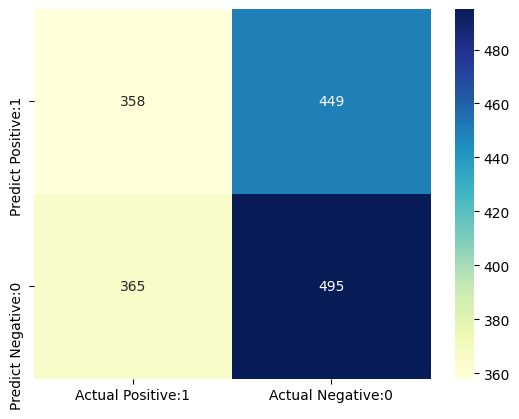

In [19]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.44      0.47       807
         1.0       0.52      0.58      0.55       860

    accuracy                           0.51      1667
   macro avg       0.51      0.51      0.51      1667
weighted avg       0.51      0.51      0.51      1667



In [ ]:
result_test = df.iloc[-10:,:].copy()
#result_test = convert_matrix(result_test, col_list[1:])
#result_test = result_test.drop(columns=['d_r'], axis=1)
# result_test

In [ ]:
X = result_test[col_list[1:]]
y = result_test[y_col]

In [ ]:
y_pred_train = clf.predict(X)

In [ ]:
y_pred_train, y

(array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1.]),
 159    0.0
 160    0.0
 161    0.0
 162    0.0
 163    1.0
 164    1.0
 165    0.0
 166    0.0
 167    1.0
 168    NaN
 Name: feature_label, dtype: float64)

In [ ]:
y_pred_train[-1]

1.0